In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "data/noemoticon.csv"
df = pd.read_csv(file_path, encoding="latin1")

print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-n

In [2]:
print(df.head(5))

   0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for the ball. Man...                                                                   
2    my whole body feels itchy and like its on fire                                                                    
3  @nationwideclass no, it's not behaving at all....           

In [3]:
#no header, add header to file
df.columns = ["polarity", "id", "date", "query", "username", "text"]

#need remove some columns
"""
1. They are irrelevant to the text classification task.
2. Avoid data leakage and prevent model cheating.
3. Reduce data dimensions and improve training speed.
4. Prevent model overfitting and enhance generalization ability.
5. Comply with data privacy policies and prevent sensitive information leakage.
"""
df = df.drop(columns=["id", "date", "query", "username"])
train_file_path = "data/noemoticon_with_header.csv"
df.to_csv(train_file_path, index=False, encoding="utf-8")

In [4]:
label_column = "polarity"
text_column = "text"

In [5]:
print(df[label_column].unique())

[0 4]


In [6]:
"""
from web:https://www.kaggle.com/datasets/prox37/sentiment-analysis-data/data
0 : negative
4 : positive
2 : neutral, but not exist
"""

print("\nSample negative texts:")
print(df[df[label_column] == 0 ].sample(2)[text_column].tolist())

print("\nSample positive texts:")
print(df[df[label_column] == 4 ].sample(2)[text_column].tolist())


"""
Exist @name in text, I think it should to be removed
"""


Sample negative texts:
["@DynamicShock oh  well yeah! Like @iamshellz  said.. they're just all jealous of you!! If they don't like you.. well they just have to -", '@Real_DavidCook you were fabulous last night! Already posted your pics on my facebook. come back VERY soon!!! I missed Avalanche though. ']

Sample positive texts:
["@meli_ry i'm curious.. do you vote for yourself? i'm almost positive you'll win.. maybe its all the years of dance and cheering! ", 'beach!!! ']


'\nExist @name in text, I think it should to be removed\n'

polarity
4    0.5
0    0.5
Name: proportion, dtype: float64


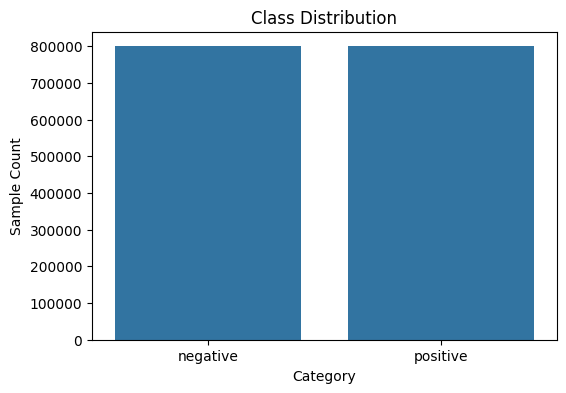

'\ndata balance\n'

In [7]:
print(df[label_column].value_counts(normalize=True))
#check sample distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df[label_column])
plt.title("Class Distribution")
plt.xticks([0, 1], ['negative', 'positive'])
plt.xlabel("Category")
plt.ylabel("Sample Count")
plt.show()


"""
data balance
"""

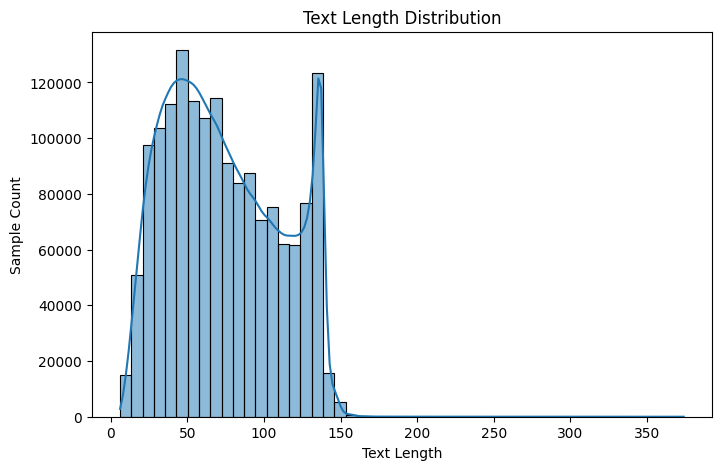


Text Length Statistics:
count    1.599999e+06
mean     7.409009e+01
std      3.644114e+01
min      6.000000e+00
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
max      3.740000e+02
Name: text_length, dtype: float64


In [8]:
if text_column in df.columns:
    df["text_length"] = df[text_column].astype(str).apply(len)

    plt.figure(figsize=(8,5))
    sns.histplot(df["text_length"], bins=50, kde=True)
    plt.title("Text Length Distribution")
    plt.xlabel("Text Length")
    plt.ylabel("Sample Count")
    plt.show()

    print("\nText Length Statistics:")
    print(df["text_length"].describe())

    """
    Every Text not very long
    """

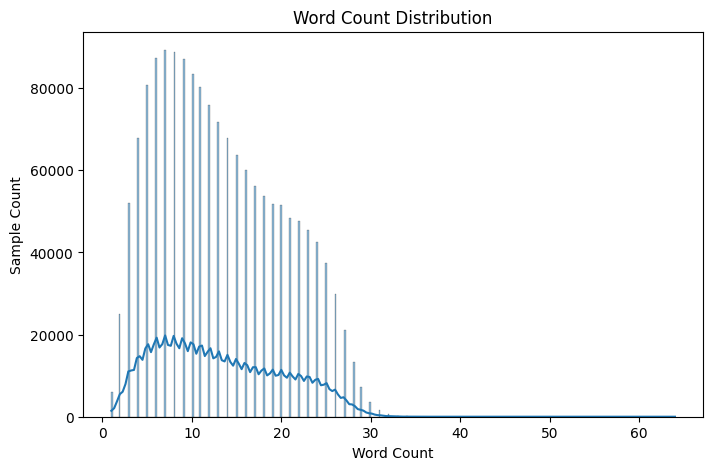


Word Count Statistics:
count    1.599999e+06
mean     1.317615e+01
std      6.957979e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.200000e+01
75%      1.900000e+01
max      6.400000e+01
Name: word_count, dtype: float64


'\nNot many words in each text\n'

In [9]:
text_column = "text"
if text_column in df.columns:
    df["word_count"] = df[text_column].astype(str).apply(lambda x: len(x.split()))

    plt.figure(figsize=(8,5))
    sns.histplot(df["word_count"], kde=True)
    plt.title("Word Count Distribution")
    plt.xlabel("Word Count")
    plt.ylabel("Sample Count")
    plt.show()

    print("\nWord Count Statistics:")
    print(df["word_count"].describe())

"""
Not many words in each text
"""

In [10]:
from collections import Counter
import matplotlib.pyplot as plt

text_column = "text"

if text_column in df.columns:
    all_words = " ".join(df[text_column].astype(str)).split()
    word_freq = Counter(all_words)
    word_freq_df = pd.DataFrame(word_freq.items(), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False)

    print(word_freq_df.head(30))
"""simply show most frequency words"""

     Word  Frequency
30     to     552961
22      I     496619
27    the     487501
15      a     366211
39     my     280025
11    and     275263
59      i     250016
0      is     217693
63    you     213871
26    for     209801
100    in     202294
37     of     179553
93     it     171812
46     on     154365
92   have     132249
181    so     125155
96     me     122509
2    that     118685
142  with     110843
302    be     108069
132   but     106272
53     at     102196
83    I'm      99559
116   was      99140
104  just      96284
51    not      88110
201  this      77810
182   get      76734
44   like      73302
435   are      72568


'simply show most frequency words'

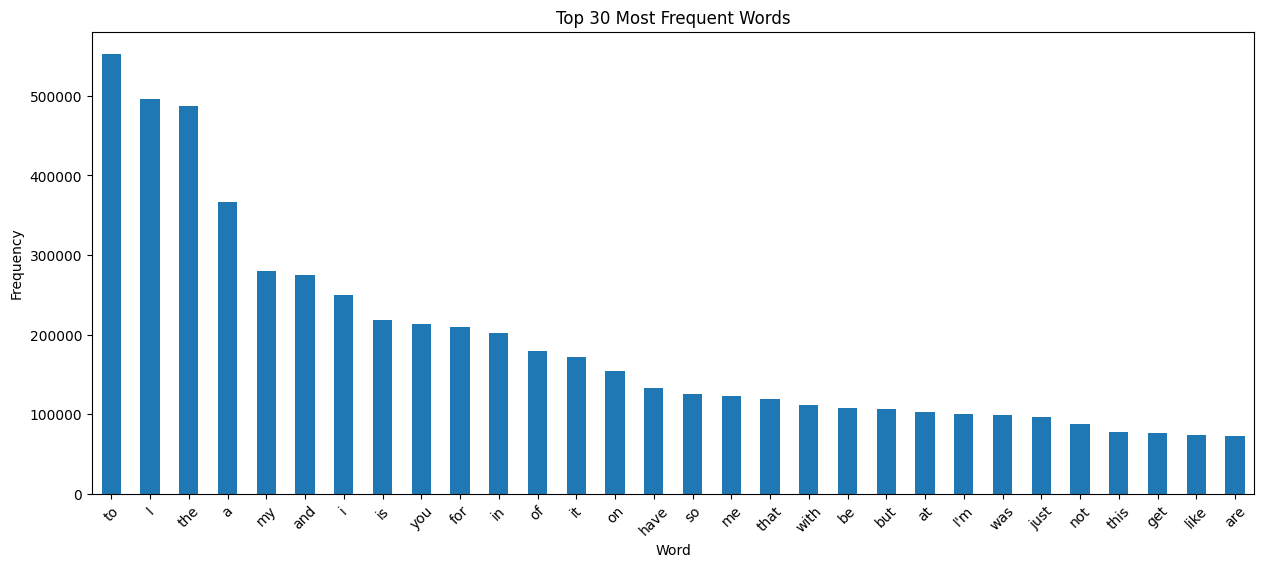

In [11]:
# visulaization
# plt.figure(figsize=(10, 4))
word_freq_df.head(30).plot(kind="bar", x="Word", y="Frequency", legend=False)
plt.gcf().set_size_inches(15, 6)
plt.title("Top 30 Most Frequent Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [12]:
print(word_freq_df.tail(30))

"""
how to handle this??
"""

                             Word  Frequency
622110   http://twitpic.com/7s9p1          1
622143                    supperr          1
622111                 @mialegria          1
622112                     yet,in          1
622113                   open/see          1
622114             feeling...odd?          1
622115                   @yalumpi          1
622116                      LAAA!          1
622117                       HEH!          1
622118                   @bsalais          1
622121           Germany.Release:          1
622122                Work....god          1
622123            #twitterapifail          1
622124              visithraa...u          1
622125                   no?...so          1
622126            really....gotta          1
622128                   lawsuit;          1
622129            @nicoleschwabss          1
622130                compeletely          1
622131                   degrese.          1
622132                       DCan          1
622134    

'\nhow to handle this??\n'

In [13]:
#too much meaningless stop words, remove them and plot angin
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english")  # 去除停用词
X = vectorizer.fit_transform(df["text"].astype(str))

# 统计词频
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1))

# 转换为 DataFrame
word_freq_df = pd.DataFrame(word_freq.items(), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False)

# 显示前 20 个单词
print(word_freq_df.head(30))

            Word     Frequency
330251      just  20727.674241
255397      good  18047.677167
177164       day  17915.245803
660348      work  16037.711029
613954     today  14607.315040
369027      like  14071.813692
254722     going  14028.411284
379165      love  12925.055762
500796      quot  12618.611291
610794      time  12086.739806
256706       got  12022.428762
376106       lol  11167.539137
282773      http  10968.834549
508134    really  10905.399849
291566        im  10754.846414
194289       don  10673.353126
349613      know  10578.906415
279223      home  10302.361435
447438     night  10098.496152
647709      want  10070.892502
424616   morning   9267.948924
415047      miss   9040.386903
443915       new   9005.894719
599877    thanks   8945.299857
155094       com   8844.530225
607170     think   8794.514299
458674        oh   8642.752722
66970        amp   8451.452641
615338  tomorrow   8439.077674
627173   twitter   8406.436262


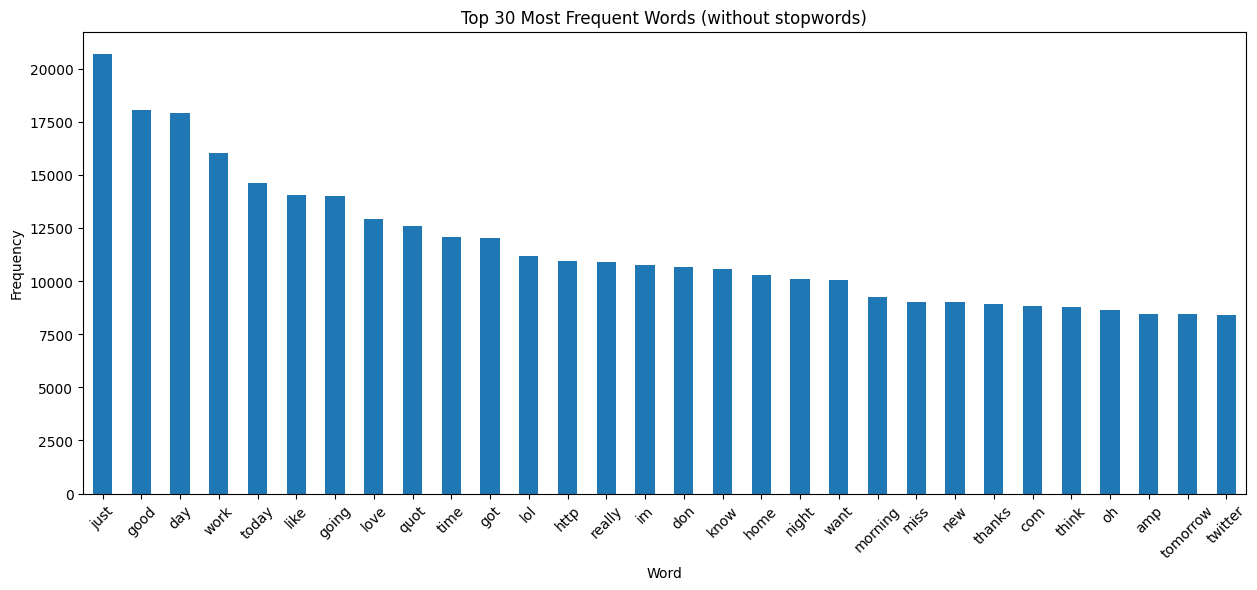

In [14]:
# visulaization
word_freq_df.head(30).plot(kind="bar", x="Word", y="Frequency", legend=False)
plt.gcf().set_size_inches(15, 6)
plt.title("Top 30 Most Frequent Words (without stopwords)")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()